# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
beans=pd.read_csv("Dry_Bean.csv")

In [5]:
print(beans.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [15]:
print(beans.shape)

(13611, 17)


In [13]:
print(len(beans.columns.tolist()))


17


In [14]:
print(beans.columns.to_list())

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
print(beans.describe())

In [19]:
print(beans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

##### Categories

In [6]:
print(beans.Class.unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


##### Remove Nulls

In [18]:
print(beans.isna().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Data Analysis

In [4]:
print(beans['Class'].value_counts(sort=False))

Class
SEKER       2027
BARBUNYA    1322
BOMBAY       522
CALI        1630
HOROZ       1928
SIRA        2636
DERMASON    3546
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x200b59a07d0>,
 [Text(5, 0, 'SEKER'),
  Text(10, 0, 'BARBUNYA'),
  Text(15, 0, 'BOMBAY'),
  Text(20, 0, 'CALI'),
  Text(25, 0, 'HOROZ'),
  Text(30, 0, 'SIRA'),
  Text(35, 0, 'DERMASON')])

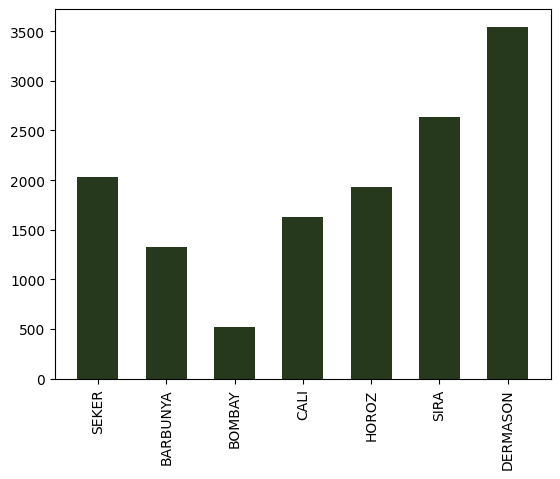

In [24]:
categories=beans.Class.unique()
heights=beans.Class.value_counts(sort=False)
plt.bar(x=np.arange(5,40, step=5),height=heights,color="#27391C", width=3)
plt.xticks(labels=categories, ticks=np.arange(5,40, step=5), rotation=90)
# plt.scatter(x=np.arange(5,40, step=5), y=heights)

### Heatmap

Text(0.5, 1.0, 'Corellation Heatmap')

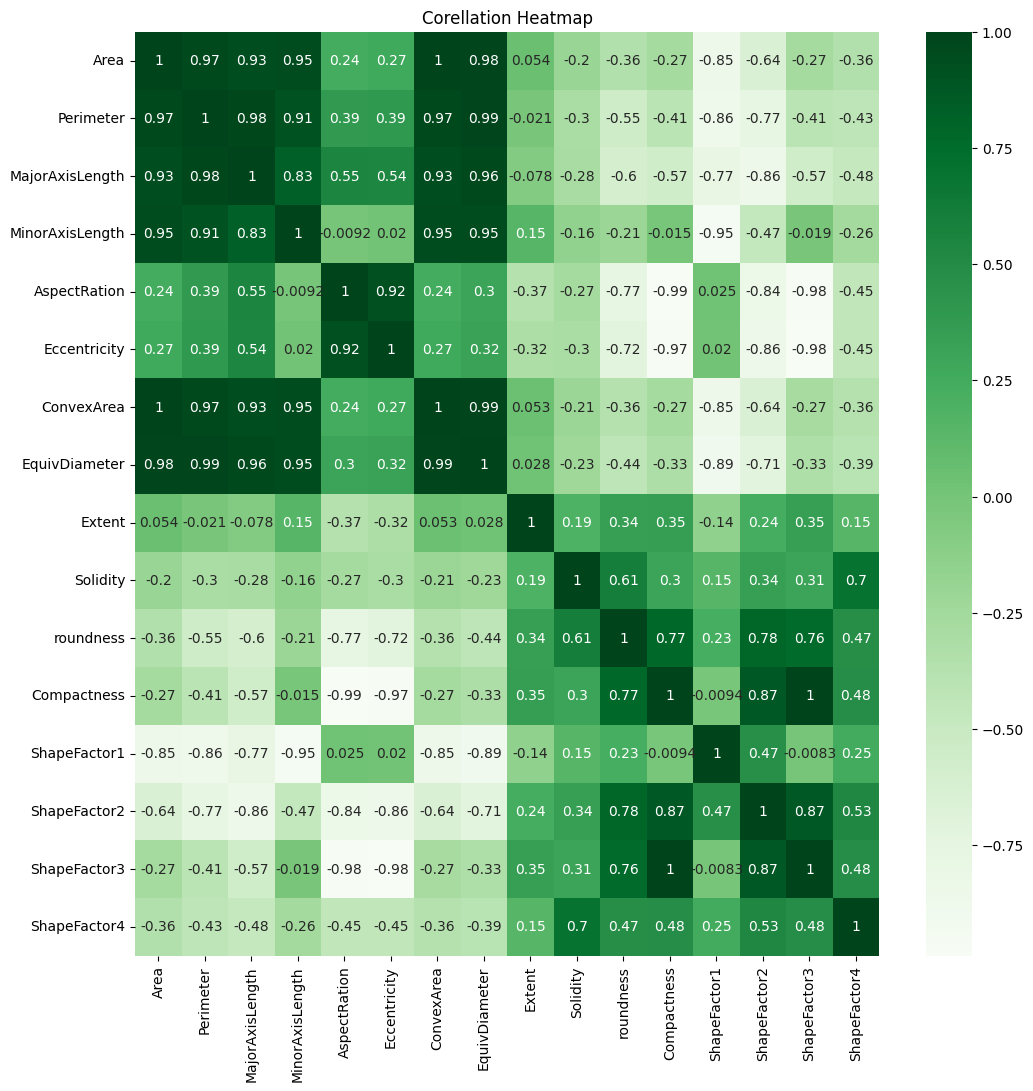

In [17]:
columns=beans.columns.tolist()
columns.pop()
beans_classless=beans[columns]
# print(beans_classless.head())

corr_mat=beans_classless.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, annot=True ,cmap="Greens")
plt.title("Corellation Heatmap")

### Pairplot

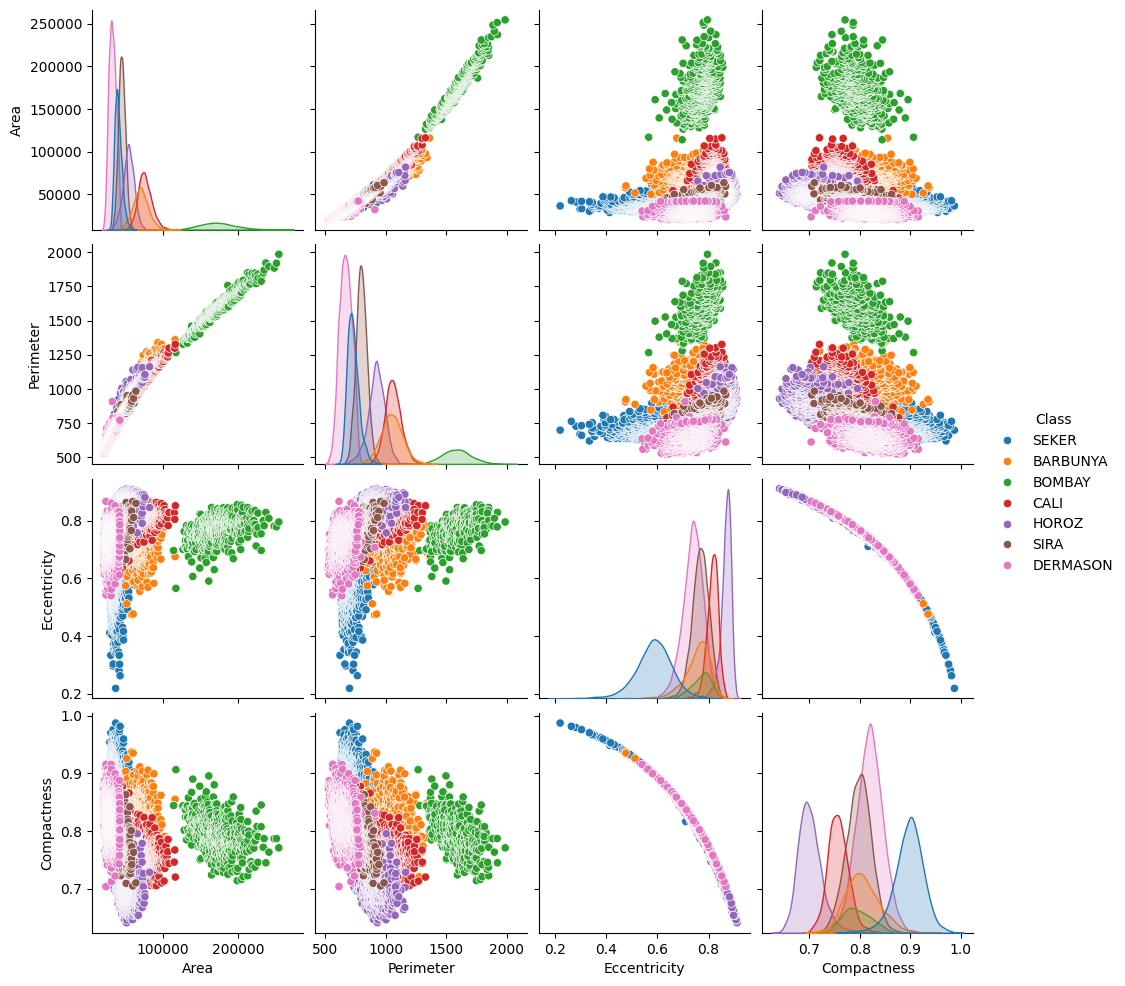

In [5]:
beans_pair=beans.loc[:,['Area', 'Perimeter', 'Eccentricity', 'Compactness', 'Class']]
sns.pairplot(data=beans_pair, hue="Class")

### Check Skewness

In [4]:
columns=beans.columns.tolist()
columns.pop()
beans_classless=beans[columns]
# print(beans_classless.head())

rightskew=[]
leftskew=[]

print(beans_classless.skew(axis='rows'))
for col,x in zip(columns,beans_classless.skew(axis='rows')):
    if(x>0.75 or x<-0.75):
        print(col,'-',x)
        if(x>0.75):
            rightskew.append(col)
        else:
            leftskew.append(col)

print('Right Skew Columns', rightskew)
print('Left Skew Columns', leftskew)

Area               2.952931
Perimeter          1.626124
MajorAxisLength    1.357815
MinorAxisLength    2.238211
AspectRation       0.582573
Eccentricity      -1.062824
ConvexArea         2.941821
EquivDiameter      1.948958
Extent            -0.895348
Solidity          -2.550093
roundness         -0.635749
Compactness        0.037115
ShapeFactor1      -0.534141
ShapeFactor2       0.301226
ShapeFactor3       0.242481
ShapeFactor4      -2.759483
dtype: float64
Area - 2.9529309714284606
Perimeter - 1.6261235244866201
MajorAxisLength - 1.3578152835457427
MinorAxisLength - 2.2382105395651473
Eccentricity - -1.0628239308671301
ConvexArea - 2.9418211110165506
EquivDiameter - 1.9489576094878978
Extent - -0.8953484276830443
Solidity - -2.5500931058430196
ShapeFactor4 - -2.759482909435988
Right Skew Columns ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
Left Skew Columns ['Eccentricity', 'Extent', 'Solidity', 'ShapeFactor4']


# Feature Engineering

### Log Transform for Right Skewed Data

In [5]:
import math

beans_rightsk=beans.copy()

for col in rightskew:
    beans_rightsk[col]=[math.log(x) for x in beans[col]]

# after treating right skewness

print(beans_rightsk[rightskew].skew(axis='rows'))

Area               1.071374
Perimeter          0.842886
MajorAxisLength    0.629485
MinorAxisLength    1.308713
ConvexArea         1.066049
EquivDiameter      1.071374
dtype: float64


### Boxcox Transform for Left Skewed Data

In [6]:
from scipy.stats import boxcox

beans_skew=beans_rightsk.copy()

for col in leftskew:
    beans_skew[col], optimal_lambda=boxcox(beans_rightsk[col])

# after treating left skewness

print(beans_skew[leftskew].skew(axis='rows'))

Eccentricity   -0.090440
Extent         -0.102335
Solidity       -0.134842
ShapeFactor4   -0.300440
dtype: float64


### Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
beans_scaled=beans_skew.copy()
scaler=StandardScaler()
columns=beans_scaled.columns.tolist()
columns.pop()
beans_scaled[columns]=scaler.fit_transform(beans_skew[columns])
print(beans_scaled.head())

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -1.281165  -1.383468        -1.627192        -0.683819     -1.565053   
1 -1.252271  -1.185584        -1.780023        -0.425037     -1.969784   
2 -1.198142  -1.283745        -1.537093        -0.622918     -1.514291   
3 -1.146650  -1.131010        -1.580811        -0.431260     -1.741618   
4 -1.135964  -1.312209        -1.753189        -0.214025     -2.117993   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -1.856936   -1.281568      -1.281165  0.159174  0.249764   1.423867   
1     -2.370929   -1.243241      -1.252271  0.681885 -0.816516   0.231054   
2     -1.786929   -1.200518      -1.198142  0.521982  0.505548   1.252865   
3     -2.094045   -1.117421      -1.146650  0.646211 -1.913219   0.515049   
4     -2.516921   -1.141797      -1.135964  0.389833  1.058077   1.874992   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     1.8391

# ML Analysis

### K-Means

Text(0.5, 1.0, 'Inertia v/s Clusters')

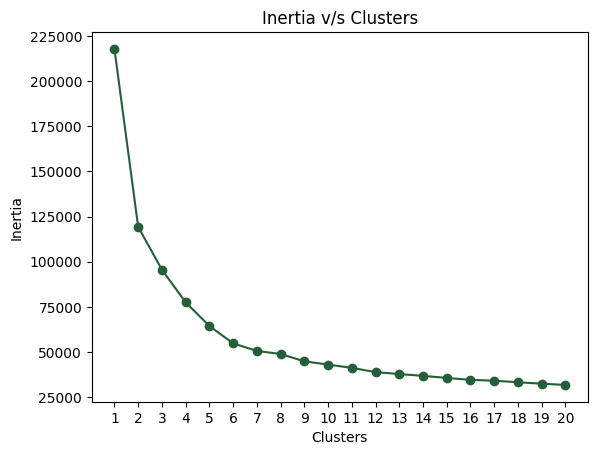

In [8]:
from sklearn.cluster import KMeans

columns=beans_scaled.columns.tolist()
columns.pop()

kmean_list=[]
for k in range(1,21):
    km=KMeans(n_clusters=k,random_state=27)
    km=km.fit(beans_scaled[columns])
    kmean_list.append(pd.Series({'clusters':k, 'inertia':km.inertia_, 'model':km}))

clusters=range(1,21)
inertias=[]

for i in kmean_list:
    inertias.append(i['inertia'])

plt.plot(clusters, inertias, marker='o',linestyle='-',color='#255F38')
plt.xticks(clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Inertia v/s Clusters')

In [27]:
from sklearn.cluster import KMeans

columns=beans_scaled.columns.tolist()
columns.pop()

km=KMeans(n_clusters=7, random_state=27)
km=km.fit(beans_scaled[columns])

beans_kmeans=beans_scaled.copy()
beans_kmeans['k_means']=km.predict(beans_scaled[columns])

categories=beans_scaled['Class'].unique()

# for category in categories:
#     x=beans_kmeans[beans_kmeans['Class']==category].k_means.value_counts().index[0]
#     print(category,'-',x)

print('Fraction and Efficiency')
for category in categories:
    x=beans_kmeans[beans_kmeans['Class']==category].k_means.value_counts().iloc[0]
    y=beans_kmeans[beans_kmeans['Class']==category].k_means.count()
    print(category, ':', x, '/', y, '=', round((100*x)/y, 2), '%')

# print(beans_kmeans.sample(5))

Fraction and Efficiency
SEKER : 1900 / 2027 = 93.73 %
BARBUNYA : 1053 / 1322 = 79.65 %
BOMBAY : 522 / 522 = 100.0 %
CALI : 1550 / 1630 = 95.09 %
HOROZ : 1793 / 1928 = 93.0 %
SIRA : 2412 / 2636 = 91.5 %
DERMASON : 2783 / 3546 = 78.48 %


### Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

columns=beans_scaled.columns.tolist()
columns.pop()

ag=AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag=ag.fit(beans_scaled[columns])

beans_ag=beans_scaled.copy()
beans_ag['agglo']=ag.fit_predict(beans_scaled[columns])

categories=beans_scaled['Class'].unique()

# for category in categories:
#     x=beans_ag[beans_ag['Class']==category].agglo.value_counts().index[0]
#     print(category,'-',x)

print('Fraction and Efficiency')
for category in categories:
    x=beans_ag[beans_ag['Class']==category].agglo.value_counts().iloc[0]
    y=beans_ag[beans_ag['Class']==category].agglo.count()
    print(category, ':', x, '/', y, '=', round((100*x)/y, 2), '%')
# print(beans_ag.sample(5))

Fraction and Efficiency
SEKER : 1816 / 2027 = 89.59 %
BARBUNYA : 1044 / 1322 = 78.97 %
BOMBAY : 522 / 522 = 100.0 %
CALI : 1539 / 1630 = 94.42 %
HOROZ : 1764 / 1928 = 91.49 %
SIRA : 1965 / 2636 = 74.54 %
DERMASON : 3191 / 3546 = 89.99 %


### DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

columns=beans_scaled.columns.tolist()
columns.pop()

dbs=DBSCAN(eps=0.5, min_samples=11)
dbs=dbs.fit(beans_scaled[columns])

beans_dbs=beans_scaled.copy()
beans_dbs['db']=dbs.fit_predict(beans_scaled[columns])

print(beans_dbs['db'].unique())

[-1  0  5  7  1  4  2  3  6 15  8 16 17  9 10 12 11 13 14]


### Mean Shift

In [35]:
from sklearn.cluster import MeanShift

columns=beans_scaled.columns.tolist()
columns.pop()

ms=MeanShift(bandwidth=2.8, n_jobs=-1)
ms=ms.fit(beans_scaled[columns])

beans_ms=beans_scaled.copy()
beans_ms['ms']=ms.fit_predict(beans_scaled[columns])

print(beans_ms['ms'].unique())

[0 3 1 2]


# Practice/Testing

In [24]:

print(beans['Class'].value_counts()[0])

3546


C:\Users\CBSS2\AppData\Local\Temp\ipykernel_22716\353587766.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(beans['Class'].value_counts()[0])
